# Question 2 (20 pts) -- COMPLETE
Use with a dataset different from IRIS the following technique in the following link:
https://scikitlearn.org/stable/auto_examples/ensemble/plot_forest_importances.html (scikit).
Explain why this technique is important.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import *
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [ ]:
# load sample data 
X, y = load_wine(return_X_y= True)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)


In [ ]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 2.731 seconds


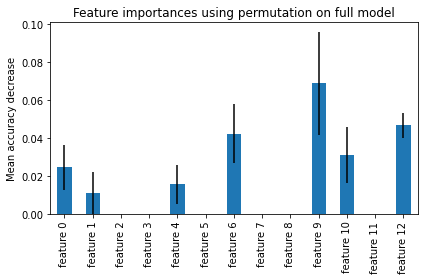

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

From the above code sample we can see that out of the 12 features in the wind dataset only 7 of them are of any importance. With feature 0, 1,4, and 10 having the lowest values. This type if evaluation techquine of data is important because it can act as a type of PCA analysis before computing the PCA analysis. If we evalute the data like this, and decide that the only features of any importance are feature 6, 9, and 12, we can drastically reduce our classification time, especially with extremly large datasets.

In [ ]:
scaled = StandardScaler()
X_scale = scaled.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scale, y, stratify=y, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
clf.predict(X_test[:, :])

clf.predict_proba(X_test[:, :])
clf.score(X_test, y_test)

0.9777777777777777

In [ ]:
x = load_wine()
df = pd.DataFrame(x.data, columns = x.feature_names)

Only keeping 6, 9 and 12 aka flavanoids, color_intensity, proline

In [ ]:
df = df.drop(columns = ['alcohol','malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'nonflavanoid_phenols', 'proanthocyanins', 'hue', 'od280/od315_of_diluted_wines'])

In [ ]:
df.head()

,flavanoids,color_intensity,proline
0,3.06,5.64,1065.0
1,2.76,4.38,1050.0
2,3.24,5.68,1185.0
3,3.49,7.80,1480.0
4,2.69,4.32,735.0


In [ ]:
scaled = StandardScaler()
X_scale = scaled.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(
    X_scale, y, stratify=y, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
clf.predict(X_test[:, :])

clf.predict_proba(X_test[:, :])
clf.score(X_test, y_test)

0.9333333333333333

Score hardly went down for removing nearly all of the features in the dataset, if we included all of the features that have any relevance we would have the same prediciton score as if we didnt reduce the dataset